![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


# __Image Classification with Convolutional Neural Networks (CNN's)__

#### Author: Alexander Fred Ojala

**Sources:** Francois Chollet, Tensorflow docs, LeNet (https://engmrk.com/lenet-5-a-classic-cnn-architecture/)

**Copright:** Feel free to do whatever you want with this code.

---

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.10.0'

# Recap DNN on MNIST

# MNIST info
The MNIST data is split into three parts: 60,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test).

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.

Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:

![https://www.tensorflow.org/images/MNIST-Matrix.png](https://www.tensorflow.org/images/MNIST-Matrix.png)

We can flatten this array into a vector of 28x28 = 784 numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space, with a very rich structure (warning: computationally intensive visualizations).

Flattening the data throws away information about the 2D structure of the image. Isn't that bad? Well, the best computer vision methods do exploit this structure. But the simple method we will be using here, a softmax regression, won't.

The result is that mnist.train.images is a tensor (an n-dimensional array) with a shape of [60000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.

![https://www.tensorflow.org/images/mnist-train-xs.png](https://www.tensorflow.org/images/mnist-train-xs.png)

Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

In [30]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)


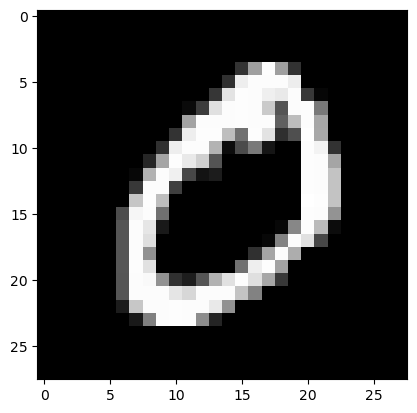

In [32]:
plt.imshow(x_train[1],cmap='gray');

In [33]:
print('First 10 outputs:')
print(y_train[:10])

First 10 outputs:
[5 0 4 1 9 2 1 3 1 4]


In [37]:
# Preprocess for DNN

# Normalize the data, flatten inputs, and convert datatype
x_train = x_train.reshape(60000, 28*28). \
                    astype('float32') / 255 #784

x_test = x_test.reshape(10000, 28*28) \
                    .astype('float32') / 255

# DNN classifier

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation='relu', \
                    input_shape=(784,)))

# Second..
model.add(Dense(200, activation='relu'))

# Third..
model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [40]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
# train the model
NO_EPOCHS = 10
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2474 - accuracy: 0.9258 - val_loss: 0.1265 - val_accuracy: 0.9606
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9692 - val_loss: 0.1293 - val_accuracy: 0.9593
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9795 - val_loss: 0.1043 - val_accuracy: 0.9705
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0922 - val_accuracy: 0.9733
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.1095 - val_accuracy: 0.9694
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0942 - val_accuracy: 0.9764
Epoch 7/10
750/750 [==============================] - 1s 2ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.1001 - val_accuracy: 0.9749
Epoch 

In [42]:
model.evaluate(x_test,y_test,verbose=0)[1]

0.9781000018119812

In [43]:
def plot_loss_acc(hist):
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['accuracy'], 'o-')
    ax.plot([None] + hist.history['val_accuracy'], 'x-')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train acc', 'Validation acc'], loc = 0)
    ax.set_title('Training/Validation acc per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()
    
    f, ax = plt.subplots()
    ax.plot([None] + hist.history['loss'], 'o-',c='r')
    ax.plot([None] + hist.history['val_loss'], 'x-',c='g')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train loss', 'Validation loss'], loc = 0)
    ax.set_title('Training/Validation loss per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Acc') 
    plt.plot()

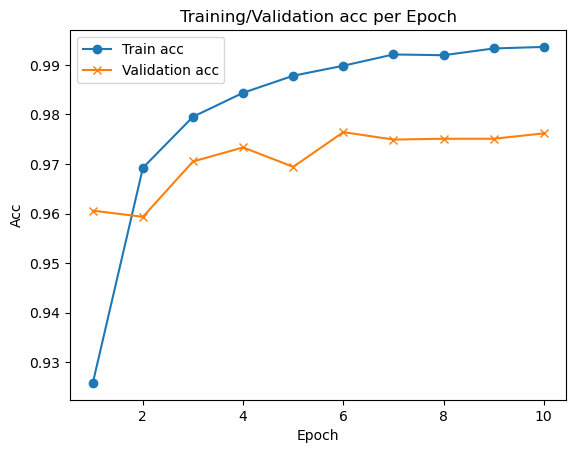

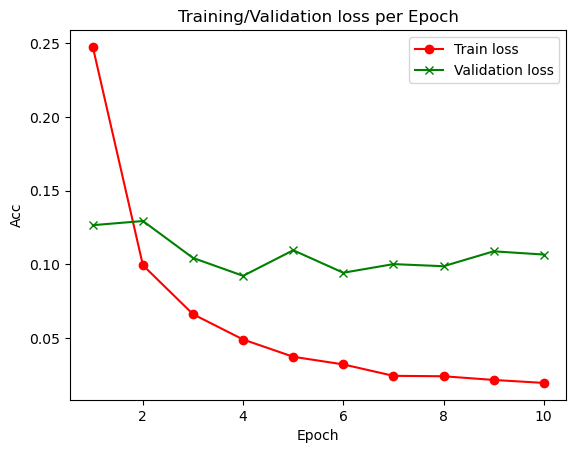

In [44]:
plot_loss_acc(history)

**Note: Training loss is lower for the first epochs, because:**

*The training loss is the average of the losses over each batch of training data. Because your model is changing over time, the loss over the first batches of an epoch is generally higher than over the last batches. On the other hand, the testing loss for an epoch is computed using the model as it is at the end of the epoch, resulting in a lower loss.*

# MNIST classification w/ CNNs
Import MNIST data again so that we keep spatial structure of the images and transform, normalize plus add depth for color channel

In [46]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import pandas

# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = pandas.get_dummies(y_train).values
y_test = pandas.get_dummies(y_test).values

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1) # add depth dimension of the inputs
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [47]:
x_train.shape

(60000, 28, 28, 1)

# Vanilla / Baseline CNN 
## LeNet, used for digit classification in the 90's
Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner proposed a neural network architecture for handwritten character recognition in 1990’s which they called LeNet-5. This is oftentimes used as the baseline CNN model that is trained.

![](./imgs/lenet.png)

# First layer:

Input is a 32×32 grayscale image which passes through the first convolutional layer with 6 feature maps or filters having size 5×5 and a stride of one. The image dimensions changes from 32x32x1 to 28x28x6.

![](imgs/lenet1.png)

In [69]:
# first layer
model = keras.Sequential()

model.add(keras.layers.ZeroPadding2D(padding=(2, 2), input_shape=(28,28,1)))

model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), \
                        activation='relu'))

# Second Layer:

Then the LeNet-5 applies average pooling layer or sub-sampling layer with a filter size 2×2 and a stride of two. The resulting image dimensions will be reduced to 14x14x6.

![](imgs/lenet2.png)

In [70]:
#second layer
model.add(layers.AveragePooling2D(strides=(2,2)))

# Third Layer:

Next, there is a second convolutional layer with 16 feature maps having size 5×5 and a stride of 1. The main reason is to break the symmetry in the network and keeps the number of connections within reasonable bounds.

![](imgs/lenet3.png)

In [71]:
#Third layer
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Fourth Layer:

The fourth layer (S4) is again an average pooling layer with filter size 2×2 and a stride of 2.

![](imgs/lenet4.png)

In [72]:
# Fourth layer
model.add(layers.AveragePooling2D(strides=(2,2)))

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 32, 32, 1)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_7 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_8 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                      

# Fifth Layer:

The fifth layer (C5) is a fully connected convolutional layer with 120 feature maps each of size 1×1. Each of the 120 units in C5 is connected to all the 400 nodes (5x5x16) in the fourth layer S4. 

![](imgs/lenet5.png)

In [74]:
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))

# Sixth Layer:

The sixth layer is a fully connected layer (F6) with 84 units.

![](imgs/lenet6.png)

In [75]:
#Sixth layer
model.add(layers.Dense(units=84, activation='relu'))

# Output Layer:

Finally, there is a fully connected softmax output layer ŷ with 10 possible values corresponding to the digits from 0 to 9.
Fully Connected Output Layer

![](imgs/lenet7.png)

In [76]:
# Output layer
model.add(layers.Dense(units=10, activation = 'softmax'))

# Model Summary:

![](imgs/lenet_summary.png)

In [77]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 32, 32, 1)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_7 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_8 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                      

In [78]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, \
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [79]:
hist = model.fit(x=x_train,y=y_train, epochs=10, \
                 batch_size=128, validation_data=(x_test, y_test), \
                 verbose=1) 

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3319 - accuracy: 0.9050 - val_loss: 0.1205 - val_accuracy: 0.9635
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1019 - accuracy: 0.9698 - val_loss: 0.0661 - val_accuracy: 0.9786
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0711 - accuracy: 0.9784 - val_loss: 0.0526 - val_accuracy: 0.9822
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 0.0447 - val_accuracy: 0.9834
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0369 - val_accuracy: 0.9881
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0394 - val_accuracy: 0.9874
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0345 - val_accuracy: 0.9899
Epoch 

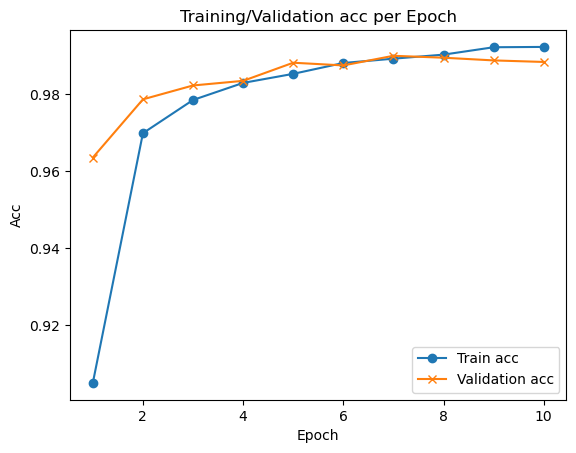

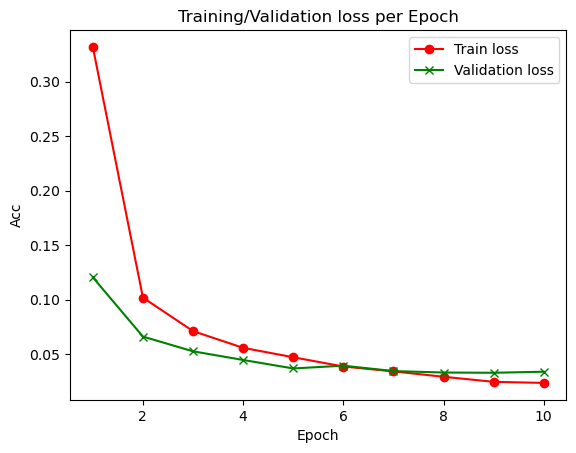

In [80]:
# plot model accuracy / epoch
plot_loss_acc(hist)

In [81]:
hist.history['val_accuracy'][-1]

0.9883000254631042

In [82]:
# Amazing improvement!
(1-hist.history['val_accuracy'][-1])/(1-history.history['val_accuracy'][-1])

0.49090799960986053

# Takeaways
Great accuracy in just a couple of epochs. No regularization applied.

-----

# Cats vs Dogs

### Table of Contents

> #### [Part 1: Keras Tensorflow + all dependencies](#Part-1:-Install-Keras-+-Tensorflow)

> #### [Part 2: Training from scratch + data augmentation](#Part-2:-Extract-bottleneck-features-from-the-data-set)

> #### [Part 3: Transfer Learning. Extract bottleneck features from the data set](#Part-2:-Extract-bottleneck-features-from-the-data-set)

> #### [Part 4: Train the top layer of your CNN](#Part-3:-Train-the-top-layer-of-your-CNN)

> #### [Part 5: Make predicitons on the mixed test images](#Part-4:-Validate-accuracy-and-make-predictions-on-unlabeled-data)

### Old material

> #### [TRAIN NETWORK TO CLASSIFY 50 IMAGE CLASSES w Theano](#Part-5----right-now-built-for-Theano)
___

<div id='sec1'></div>

# Part 1: Install Keras + Tensorflow

- **Install TensorFlow:** Run the command `conda install tensorflow`
- **Install Keras:** Run the command `conda install keras`

See https://keras.io/#installation and https://www.tensorflow.org/install/

# Make sure that TensorFlow is used as the backend

**Read more at:** https://keras.io/backend/#switching-from-one-backend-to-another

# Import packages

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
#from keras import backend as K
#K.set_image_dim_ordering('tf') # note that we need to have tensorflow dimension ordering still because of the weigths.
#print('The backend is:',K.backend())
#import tensorflow as tf
#print(K.image_dim_ordering()) # should say tf
#print(tf.__version__) # tested for 1.11.0
#
#import keras
#print(keras.__version__) # tested for 2.2.4

In [ ]:
# Import relevant packages
from __future__ import absolute_import, division, print_function # make it compatible w Python 2
import os
import h5py # to handle weights
import os, random
import numpy as np
import pandas as pd
import cv2 #conda install open-cv

import matplotlib.pyplot as plt
%matplotlib inline 

from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image

from IPython.display import Image, display

# fix random seed for reproducibility
np.random.seed(150)

# Load in and process data

In [ ]:
%ls

In [ ]:
# Look at files, note all cat images and dog images are unique
for path, dirs, files in os.walk('./data'):
    print('FOLDER',path)
    for f in files[:2]:
        print(f)

In [ ]:
print('Number of cat training images:', len(next(os.walk('./data/train/cats'))[2]))
print('Number of dog training images:', len(next(os.walk('./data/train/dogs'))[2]))
print('Number of cat validation images:', len(next(os.walk('./data/validation/cats'))[2]))
print('Number of dog validation images:', len(next(os.walk('./data/validation/dogs'))[2]))
print('Number of uncategorized test images:', len(next(os.walk('./data/test/catvdog'))[2]))

# There should be 1000 train cat images, 1000 train dogs, 
# 400 validation cats, 400 validation dogs, 100 uncategorized

In [ ]:
# Define variables
TRAIN_DIR = './data/train/'
VAL_DIR = './data/validation/'
TEST_DIR = './data/test/' #mixed cats and dogs

img_width, img_height = 150, 150

n_train_samples = 2000
n_validation_samples = 800
n_epoch = 20
n_test_samples = 100

<a id='sec6'></a>
# Part 2: Training a small convnet from scratch

The right tool for an image classification job is a convnet, so let's try to train one on our data, as an initial baseline. Very similar to LeNet, as a baseline. Roughly ~75% accuracy. Takes 30mins to train on a CPU.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


# Data preprocessing

Data should be formatted into appropriately pre-processed floating point tensors before being fed into our network. Currently, our data is JPEG files, so the steps for getting it into our network are roughly:

    Read the picture files.
    Decode the JPEG content to RBG grids of pixels.
    Convert these into floating point tensors.
    Rescale the pixel values (between 0 and 255) to the [0, 1] interval.

Keras has utilities to take care of these steps automatically.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        TRAIN_DIR,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        VAL_DIR,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). 20 is the number of samples in each batch (the batch size).

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break



Let's fit our model to the data using the generator. We do it using the `fit_generator method`, the equivalent of fit for data generators like ours. Need to define steps_per_epoch because of generator.

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=40)

In [ ]:
#history_scratch = history

#model.save('cats_and_dogs_small_1.h5')

In [ ]:
from tensorflow.keras.models import load_model

mod = load_model('cats_and_dogs_small_1.h5')
mod.summary()  # As a reminder.

In [ ]:
mod.evaluate_generator(validation_generator,steps=40,verbose=1)[1]

```python
import matplotlib.pyplot as plt

history = history_scratch

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
```
![](imgs/cnn_scratch.png)



These plots are characteristic of overfitting. Our training accuracy increases until it reaches nearly 100%, while our validation accuracy stalls at 70-72%.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. 

Overfitting can be mitigated using dropout and weight decay (L2 regularization). We are now going to introduce a new one, specific to computer vision, and used almost universally when processing images with deep learning models: data augmentation.


# Using data augmentation

Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. 

Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.


 Since we only have few examples, our number one concern should be overfitting. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions.

In [ ]:
# Import image data generator

datagen = ImageDataGenerator(
        rotation_range=40, #rotation_range degrees (0-180), range that randomly rotate pictures
        width_shift_range=0.2, #width_shift range (fraction of total width) within which to randomly translate pic
        height_shift_range=0.2, # -ii-
        
        #rescale value we multiply the data before any other processing. 
        #Our original images consist in RGB coefficients in the 0-255, 
        #but such values would be too high for our models to process (given typical learning rate), 
        # so we target values between 0 and 1 instead by scaling with a 1/255. factor.
        rescale=1./255,
        
        #randomly applying shearing transformations (shear mapping is a linear map that 
        #displaces each point in fixed direction, by an amount proportional to its 
        #signed distance from a line that is parallel to that direction)
        shear_range=0.2, 
        zoom_range=0.2, #randomly zooming inside pictures
        
        #is for randomly flipping half of the images horizontally 
        #--relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).

        horizontal_flip=True,
    
        #is the strategy used for filling in newly created pixels, 
        #which can appear after a rotation or a width/height shift.
        fill_mode='nearest')

Now let's start generating some pictures using this tool and save them to a temporary directory, so we can get a feel for what our augmentation strategy is doing --we disable rescaling in this case to keep the images displayable:

In [ ]:
import cv2
img = load_img(TRAIN_DIR+'cats/cat0002.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0

from PIL import Image


if not os.path.exists('preview'):
    os.makedirs('preview')

for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

prev_files = next(os.walk('./preview'))[2]
print(prev_files[:4])

def read_image(file_path):
    # For image visualization
    im = np.array(Image.open(file_path))
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return im

def plot_pic(img):
    # Plot openCV pic
    pic = read_image(img)    
    plt.figure(figsize=(5,5))
    plt.imshow(pic)
    plt.show()


for img in prev_files[:10]:
    print('Image '+img)
    plot_pic('./preview/'+img)

In [ ]:
# model construction

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


'''
On top of it we stick two fully-connected layers. 
We end the model with a single unit and a sigmoid activation, which is perfect for a binary classification. 
To go with it we will also use the binary_crossentropy loss to train our model.
'''

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        TRAIN_DIR,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        VAL_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
from tensorflow.keras.models import load_model

mod = load_model('cats_and_dogs_small_2.h5')
mod.summary()  # As a reminder.

In [ ]:
mod.evaluate_generator(validation_generator,steps=40,verbose=1)[1]

```python
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
```

![](imgs/new_model.png)

In [ ]:
# Plot picture and print class prediction on cats vs dogs (unsorted)


try_images =  [TEST_DIR+'catvdog/'+img for img in os.listdir(TEST_DIR+'catvdog/')]

def predict(mod,i=0,r=None):
    if r==None:
        r=[i]
        
    for idx in r:
        if 'DS_Store' in try_images[idx]:
            continue
        
        img_path = try_images[idx]
        img = image.load_img(img_path, target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        class_pred = mod.predict_classes(x,verbose=0)
        
        if class_pred == 0:
            class_guess='CAT'
        else:
            class_guess='DOG'
        
        print('\n\nI think this is a ' + class_guess)
        plot_pic(try_images[idx])

predict(mod,r=range(10))

___

# Transfer Learning
## Build a more powerful your own Cats vs Dogs binary classifier

Now we will use [Transfer learning](http://cs231n.github.io/transfer-learning/) and remove the top layer of a pretrained network [(VGG16 on Imagenet)](https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/), extracting the features of the training and validation images and then just training the fully connected top layer of that network. This way we will be able to make accurate predictions even though we just have a small data set.

The data conists of 2000 training images (1000 cats and 1000 dogs), 800 validation images (400 cats and 400 dogs), and 100 test images (cats and dogs mixed). [Get the data here.](https://www.dropbox.com/s/a8zo6udq83xsx05/data-x_cnn_data.tar.gz?dl=1) 

The pretrained VGG16 weighs that you should load into your model (in order to extract the bottleneck features) can be [downloaded here](https://www.dropbox.com/s/fvx7hv5vr8j3sc6/vgg16_weights_features.tar.gz?dl=1). Extracted features are included so that you can run the code instantly.


The reason why we are using a pretrained network, extracting bottleneck features and training only the top layers is that this is a great way to obtain a high prediction accuracy without having a huge data set and without having to run the training for a long time. It would require much more data and take up to several days to run this analysis and training your own CNN on a personal computer (in order to obtain the same level of accuracy).

<a id='sec2'></a>

# Part 2: Extract bottleneck features from the data set

A good explanation on how this works (rewritten from source: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

#### Using the bottleneck features of a pre-trained network: 90% accuracy in 1 min (GPU) / 10 mins (CPU)

We are leveraging the predictive power of a network pre-trained on a large dataset. Such a network would have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.

We will use the VGG16 architecture, pre-trained on the ImageNet dataset. Because the ImageNet dataset contains several "cat" classes (persian cat, siamese cat...) and many "dog" classes among its total of 1000 classes, this model will already have learned features that are relevant to our classification problem. In fact, it is possible that merely recording the softmax predictions of the model over our data rather than the bottleneck features would be enough to solve our dogs vs. cats classification problem extremely well. The method presented here is more likely to generalize well to a broader range of problems, including problems featuring classes absent from ImageNet.

Here's what the VGG16 architecture looks like:

![Image of Yaktocat](https://blog.keras.io/img/imgclf/vgg16_original.png)

### Horizontal visualization

![https://datatoanalytics.files.wordpress.com/2017/04/vgg161.png](https://datatoanalytics.files.wordpress.com/2017/04/vgg161.png)


### **Strategy to extract bottleneck features:** 

We will only instantiate the convolutional part of the model, everything up to the fully-connected layers. We will pass our training, validation, and test data through this model once, recording the output (the "bottleneck features" from the VGG16 model, ie the output of the last activation maps before the fully-connected layers). 

The output will be saved as three numpy arrays, and stored on disk as `.npy` files.. The reason why we are storing the features offline rather than adding our fully-connected model directly on top of a frozen convolutional base and running the whole thing, is computational effiency. Running VGG16 is expensive, especially if you're working on CPU, and we want to only do it once.

# This is how the VGG16 net looks in code
You can see the full implementation here of the network we're building and loading in: https://github.com/fchollet/keras/blob/master/keras/applications/vgg16.py


```python
    # VGG 16 model architecture
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height, 3)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Classification block
    model.add(Flatten(name='flatten')(x))
    model.add(Dense(4096, activation='relu', name='fc1')(x))
    model.add(Dense(4096, activation='relu', name='fc2')(x))
    model.add(Dense(classes, activation='softmax', name='predictions')(x))
```

## IMAGEnet Benchmarks (the structure we're using today, 2nd place in 2014)

![https://qph.ec.quoracdn.net/main-qimg-fbd17e02f01e60b38ff8ee864c647303](https://cdn-images-1.medium.com/max/800/1*HyaPKtxU07iVzZ4RjJJlUQ.png)

In [ ]:
# Function for saving bottleneck features
# This can take ~10mins to run

#  Run model once to record the bottleneck features using image data generators:

def save_bottleneck_features():

    from tensorflow.keras import applications
    model = applications.vgg16.VGG16(include_top=False, weights='imagenet', \
                                     input_tensor=None, input_shape=(img_width, img_height,3))
    
    # documentation: https://keras.io/applications/#vgg16
    
    print('TensorFlow VGG16 model architecture loaded')
    # include_top = False, because we drop last layer, then we also only need to
    # download weight file that is small
    # input_shape with channels last for tensorflow
    
    # Our original images consist in RGB coefficients in the 0-255 interval, 
    # but such values would be too high for our models to process (given typical learning rate), 
    # so we target values between 0 and 1 instead by scaling with a 1/255. factor.
    datagen = ImageDataGenerator(rescale=1./255)
    
    def generate_features(DIR,n_samples,name_str):
        '''This is a generator that will read pictures found in
        subfolers of 'data/*', and indefinitely generate
        batches of rescaled images used to predict
        the bottleneck features of the images once
        using model.predict_generator(**args**)'''

        print('Generate '+name_str+' image features')
    
        generator = datagen.flow_from_directory(
            DIR,
            target_size=(img_width, img_height),
            batch_size=1,
            class_mode=None, # this means our generator will only yield batches of data, no labels
            shuffle=False) # our data will be in order, so all first 1000 images will be cats, then 1000 dogs
        
        
        features = model.predict_generator(generator, n_samples,verbose=True)
        # the predict_generator method returns the output of a model, given
        # a generator that yields batches of numpy data
        
        np.save('features_'+name_str+'.npy', features) # save bottleneck features to file
    
    generate_features(TEST_DIR, n_test_samples, 'test')
    #generate_features(TRAIN_DIR, n_train_samples, 'train')
    #generate_features(VAL_DIR, n_validation_samples, 'validation')
    
    print('\nDone! Bottleneck features have been saved')


print('This has been done before the lecture! Takes many mins to run for all images.')
save_bottleneck_features()

In [ ]:
# Extra
# Obtain class labels and binary classification for validation data
datagen = ImageDataGenerator(rescale=1./255)
val_gen = datagen.flow_from_directory(VAL_DIR,target_size=(img_width, img_height),
                                        batch_size=32,class_mode=None,shuffle=False)

val_labels = val_gen.classes

print('\nClassifications:\n',val_gen.class_indices)
print('\nClass labels:\n',val_labels)

<a id='sec3'></a>

# Part 3: Train the top layer of your CNN

Ones you have extracted and written the bottleneck features to files, read them in again and use them to train the top layer of your network, i.e. the small fully-connected model on top of the stored features. When you have done this record and answer with your prediciton accuracy.

**Question:** What is the validation accuracy for the last training epoch, and how is it that we can reach such high accuracy with such small amount of data in a short amount of time?

In [ ]:
# Load in bottleneck features
# Run the code below to train your CNN with the training data

train_data = np.load('features_train.npy')
# the features were saved in order, so recreating the labels is easy
train_labels = np.array([0] * (n_train_samples // 2) + [1] * (n_train_samples // 2))

validation_data = np.load('features_validation.npy')
# same as val_labels above
validation_labels = np.array([0] * (n_validation_samples // 2) + [1] * (n_validation_samples // 2))

# Add top layers trained ontop of extracted VGG features
# Small fully connected model trained on top of the stored features
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

'''
#We end the model with a single unit and a sigmoid activation, which is perfect for a binary classification. 
#To go with it we will also use the binary_crossentropy loss to train our model.

'''
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

MODEL_WEIGHTS_FILE = 'vgg16-best-weights.h5'
callbacks = [ModelCheckpoint(MODEL_WEIGHTS_FILE, monitor='val_accuracy', verbose=1, save_best_only=True)]

history = model.fit(train_data, train_labels, verbose=1, \
                    nb_epoch=20, batch_size=32, \
                    validation_data=(validation_data, validation_labels),
                    callbacks=callbacks)

# Save weights to disk

# Save model architecture to disk
model_json = model.to_json()
with open("mod_appendix.json", "w") as json_file: # save model
    json_file.write(model_json)

# Save model weights
model.save_weights("catvsdogs_VGG16_pretrained_tf_top.h5") # save weights
print("Saved model to disk")
print('Done!')

In [ ]:
history.model.load_weights('vgg16-best-weights.h5')

In [ ]:
model = history.model

In [ ]:
model.summary() # only the last layer hsa 2Mn weights.

In [ ]:
acc = pd.DataFrame({'epoch': range(1,n_epoch+1),
                    'training': history.history['accuracy'],
                    'validation': history.history['val_accuracy']})
ax = acc.plot(x='epoch', figsize=(10,6), grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.7,1.0]);

<a id='sec4'></a>

# Part 4: Validate accuracy and make predictions on unlabeled data

**Question:** First use the model trained in Part 3 to determine the accuracy on the validation data set (is it the same as one the last training epoch?

Lastly, use the model trained in Part 3 to classify the test data images. I.e., create a function that loads one image from the test data and then predicts if it is a cat or a dog and with what probability it thinks it is a cat or a dog

In [ ]:
# Alternative
print('Model accuracy on validation set:',model.evaluate(validation_data,val_labels,verbose=0)[1]*100,'%')

In [ ]:
## Print try images:

# Use the model trained in Problem 1 to classify the test data images.
# Create a function that loads one image from the test data and then predicts
# if it is a cat or a dog and with what probability it thinks it is a cat or a dog
#
# Use variable test_data to make predictions
# Use list test_images to obtain the file name for all images (Note: test_images[0] corresponds to test_data[0])
# Use function plot_pic(img) to plot the image file

## Load in processed images feature to feed into bottleneck model

from PIL import Image

test_data = np.load('features_test.npy')

test_images =  [TEST_DIR+'catvdog/'+img for img in sorted(os.listdir(TEST_DIR+'catvdog/'))]

def read_image(file_path):
    # For image visualization
    im = np.array(Image.open(file_path))
    return im

def plot_pic(img):
    pic = read_image(img)    
    plt.figure(figsize=(5,5))
    plt.imshow(pic)
    plt.show()

In [ ]:
def predict(mod,i=0,r=None):
    if r==None:
        r=[i]
        
    for idx in r:
        class_pred = mod.predict_classes(test_data,verbose=0)[idx]
        prob_pred = mod.predict_proba(test_data,verbose=0)[idx]
        
        if class_pred ==0:
            prob_pred = 1-prob_pred
            class_guess='CAT'
        else:
            class_guess='DOG'
        
        print('\n\nI think this is a ' + class_guess + ' with ' +str(round(float(prob_pred)*100,5)) + '% probability')
        if test_images[idx]=='./data/test/catvdog/.DS_Store' or '.ipynb_checkpoints' in test_images[idx]:
            continue
        plot_pic(test_images[idx])

#predict(model,r=range(0,10))       
predict(model,r=range(88,len(test_images))) # seems to be doing really well

# Look into fine tuning a network and freezing layers (to get to 97% accuracy)

# Visualizing how conv nets learn
Intermediate activations

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

In [ ]:
img_path = TRAIN_DIR+'cats/cat0003.jpg'

In [ ]:
# We preprocess the image into a 4D tensor
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from tensorflow.keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

<a id='sec5'></a>

# Part 5 -- right now built for Theano

Redo the model and pipeline created in Part 1-4 in order to make predictions on the 50 image classes. Note that you might have to change how you read in the images, so that when you train the model you do a cross validation split (25 / 75) instead of specifying a specific validation set.  And, you will want to use a `softmax` activation layer instead of a `sigmoid` one (to do multiclass classification).

The data can be downloaded here: https://www.dropbox.com/s/suy8u0hnthwr2su/50_categories.tar.gz?dl=1

Note that you do not have to additional data to make predictions on data not used in the training (however you can easily download 3-5 images like that from Google to try your model).

In [ ]:
# Look at files, note all cat images and dog images are unique
for path, dirs, files in os.walk('./50_categories'):
    print('FOLDER',path)
    for f in files[:2]:
        print(f)

In [ ]:
categories = next(os.walk('./50_categories'))
print(categories)
categories = categories[1]

In [ ]:
# Map categories to an integer
cat_dic = dict()
for idx, cat in enumerate(categories):
    cat_dic[cat] = idx


In [ ]:
print(cat_dic)

In [ ]:
n_imgs = 0
for cat in categories:
    nbr_cat_imgs = len(next(os.walk('./50_categories/'+cat))[2])
    print('Number of '+cat+' images:', nbr_cat_imgs)
    n_imgs+=nbr_cat_imgs

In [ ]:
n_imgs

In [ ]:
from glob import glob
len(glob("./50_categories/*/*.jpg")) #4244 images

In [ ]:
# plot with opencv
img = cv2.imread('./50_categories/airplanes/airplanes_0001.jpg')
img.shape
plt.imshow(img)

In [ ]:
path_all_images = glob("./50_categories/*/*.jpg")
path_all_images[0:10]

In [ ]:
def get_image_categories(images):
    """Get the true categories of a set of paths to images, based on the
    directory they are located in.

    The paths should have the form:
        path/to/image/category/image.jpg

    Where the image filename is the last item in the path, and the
    directory (category name) is the second to last item in the path.

    Parameters
    ----------
    images : list
        List of paths to images

    Returns
    -------
    categories : numpy.ndarray
        An array of integers in order of the images, corresponding to
        each image's category
    category_map : list
        A list of category names. The category integers in
        `categories` are indices into this list.

    """
    get_category = lambda x: os.path.split(os.path.split(x)[0])[1]
    categories = list(map(get_category, images))
    category_map = sorted(set(categories))
    categories = np.array(map(category_map.index, categories))
    return categories, category_map



In [ ]:
img_cats, img_cat_map = get_image_categories(path_all_images)

In [ ]:
img_cat_map[0:3]

In [ ]:
# Define variables
DATA_DIR = './50_categories/'

img_width, img_height = 150, 150

n_samples = n_imgs
n_epoch = 40

In [ ]:
#  Run model once to record the bottleneck features using image data generators:
#  Note: This can take a lot of time

def save_bottleneck_features():

    # build the VGG16 network
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # load the weights of the VGG16 networks
    # note: when there is a complete match between your model definition
    # and your weight savefile, you can simply call model.load_weights(filename)
    assert os.path.exists('vgg16_weights.h5'), 'Model weights not found (Download file vgg16_weights.h5 from bcourses).'
    f = h5py.File('vgg16_weights.h5')
    for k in range(f.attrs['nb_layers']):
        if k >= len(model.layers):
            # we don't look at the last (fully-connected) layers in the savefile
            break
        g = f['layer_{}'.format(k)]
        weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
        model.layers[k].set_weights(weights)
    f.close()
    print('Model loaded.')

    
    # Rescale value we multiply the data before any other processing. 
    # Our original images consist in RGB coefficients in the 0-255, 
    # but such values would be too high for our models to process (given typical learning rate), 
    # so we target values between 0 and 1 instead by scaling with a 1/255. factor.
    datagen = ImageDataGenerator(rescale=1./255)
    
    def generate_features(DIR,n_samples,name_str):
        '''
        This is a generator that will read pictures found in
        subfolers of 'data/*', and indefinitely generate
        batches of image rescaled images used to predict
        the bottleneck features of the images once
        using model.predict_generator(**args**)
       '''
        print('Generate '+name_str+' image features')

        generator = datagen.flow_from_directory(
            DIR,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None, # this means our generator will only yield batches of data, no labels
            shuffle=False)  # our data will be in order, so all first 1000 images will be cats, then 1000 dogs

        
        features = model.predict_generator(generator, n_samples)
        # the predict_generator method returns the output of a model, given
        # a generator that yields batches of numpy data
        
        np.save(open('50_classes_features.npy', 'w'), features) # save bottleneck features to file
        
    generate_features(DATA_DIR, n_samples, 'data')


    
save_bottleneck_features()


In [ ]:
# Obtain image labels and binary classification
datagen = ImageDataGenerator(rescale=1./255)
class_gen = datagen.flow_from_directory(DATA_DIR,target_size=(img_width, img_height),
                                        batch_size=32,class_mode=None,shuffle=False)

class_labels = class_gen.classes

print('\nClassifications:\n',class_gen.class_indices)
print('\nClass labels:\n',class_labels)

print(class_gen.class_indices.keys() == cat_dic.keys())

In [ ]:
# since all of our features are stored in order
# and we have not split up our training data into training and validation folders
# in order to not only train on the first classes we need to randomize our samples
# this can easily be done with scikit-learn's test_train_split module

# we train on the X_train and y_train sets
# then we evaluate our model on the X_test and y_test sets

from sklearn.model_selection import train_test_split
class_data = np.load('50_classes_features.npy') # load in bottleneck features
print(class_data.shape)
X_train, X_test, y_train, y_test, path_train, path_test = train_test_split(class_data, class_labels, path_all_images,\
                                                                           test_size=0.2, random_state=150)
print(X_train.shape)

In [ ]:
print(path_train[0:4])
print([img_cat_map[i] for i in y_train[0:4]]) # the img_paths have been mapped correctly

In [ ]:
# Load in bottleneck features
# Run the code below to train your CNN with the training data
from keras.optimizers import SGD



# the features were saved in order, so recreating the labels is easy


# Add top layers trained ontop of extracted VGG features
# Small fully connected model trained on top of the stored features
model = Sequential()
model.add(Flatten(input_shape=class_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='softmax'))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(50, activation='softmax'))

    
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, nb_epoch=40,validation_split=0, verbose=1) # we don't need a validation split
print('Done!')

In [ ]:

val_pred_class = model.predict_classes(X_test,verbose=1)
#val_pred_prob = model.predict_proba(class_data,verbose=0)

print(model.evaluate(X_test,y_test,verbose=0))
# First number is validation loss, loss of the objective function
# Second number validation accuracy

In [ ]:
print(np.unique(val_pred_class)) #ok 50 classes in our prediction

In [ ]:
np.sum(val_pred_class==y_test)/len(y_test) # ~60% accuracy

In [ ]:
print(model.evaluate(X_test,y_test,verbose=0))

In [ ]:
print(DATA_DIR)

In [ ]:
def read_image(file_path):
    # For image visualization
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    #return cv2.resize(img, (img_height, img_width), interpolation=cv2.INTER_CUBIC)
    return img

def plot_pic(img):
    # Plot openCV pic
    pic = read_image(img)    
    plt.figure(figsize=(5,5))
    plt.imshow(pic)
    plt.show()

In [ ]:
#alternative plotpic function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_pic(img):
    image = mpimg.imread(img)
    plt.figure(figsize=(9,9))
    plt.imshow(image)
    plt.grid(False)
    plt.show()

In [ ]:
def predict(mod,i=0,r=None):
    preds = mod.predict_classes(X_test,verbose=0)
    
    if r==None:
        r=[i]
        
    for idx in r:
        
        img_path = path_test[idx]
        img = image.load_img(img_path, target_size=(150, 150))
        #x = image.img_to_array(img)
        #x = np.expand_dims(x, axis=0)
        class_pred = preds[idx]
        
        class_guess = img_cat_map[class_pred]
        
        print('\n\nProbable category: ' + class_guess)
        plot_pic(path_test[idx])

predict(model,r=range(0,100))

# As we can see below it is pretty accurate, however, for the case when we don't have many 
# training samples the accuracy is not as good.